In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from yellowbrick.style.palettes import PALETTES
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.preprocessing import normalize

In [3]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import calinski_harabasz_score

In [4]:
from sklearn.cluster import KMeans, DBSCAN

from sklearn_extra.cluster import KMedoids

import gower
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [5]:
def kmeans_clustering(data, n_clusters=3):
    scaler = StandardScaler()
    # scaled_data = scaler.fit_transform(data)

    # scaled_data = normalize(data)
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(data)
    
    return clusters, kmeans


In [6]:
def kmedoids_clustering(data, n_clusters=3):
    gower_dist = gower.gower_matrix(data)
    
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    clusters = kmedoids.fit_predict(gower_dist)
    
    return clusters, kmedoids


In [7]:
def hierarchical_clustering(data, n_clusters=3):
    gower_dist = gower.gower_matrix(data)
    
    linkage_matrix = linkage(gower_dist, method='ward')
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    
    return clusters, linkage_matrix


In [8]:
# def hierarchical_clustering(data, n_clusters=3):

#     data_normalized = normalize(data)
    
#     # Compute Gower distance matrix
#     gower_dist = gower_matrix(data_normalized)
    
#     # Perform Agglomerative Clustering
#     agglomerative = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='average')
#     clusters = agglomerative.fit_predict(gower_dist)
    
#     return clusters, agglomerative


In [9]:
def dbscan_clustering(data, eps=0.5, min_samples=5):
    # scaler = StandardScaler()
    # scaled_data = scaler.fit_transform(data)
    # scaled_data = normalize(data)
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(data)
    
    return clusters, dbscan


In [10]:
def gmm_clustering(data, n_clusters=3):
    # scaler = StandardScaler()
    # scaled_data = scaler.fit_transform(data)

    # scaled_data = normalize(data)
    
    gmm = GaussianMixture(n_components=n_clusters, random_state=42)
    clusters = gmm.fit_predict(data)
    
    return clusters, gmm


In [11]:
data = pd.read_csv('../ASIA_CCS_Data/final_feature_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 41 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   FQDN                                         2118 non-null   object 
 1   Searched_URL                                 2118 non-null   object 
 2   Status Code                                  2118 non-null   int64  
 3   External_unique_URL_List                     2118 non-null   object 
 4   Landing_Page_Size_In_KB                      2118 non-null   float64
 5   Same Landing Domain                          2118 non-null   int64  
 6   Has Bank Related Keywords                    2118 non-null   int64  
 7   Has Crypto Related Keywords                  2118 non-null   int64  
 8   Has Card Related Keywords                    2118 non-null   int64  
 9   Unique_Internal_Page_Link_Cnt                2118 non-null   int64  
 10  

In [12]:
df = data.select_dtypes(include='number').drop(columns=['Status Code'], axis=1)

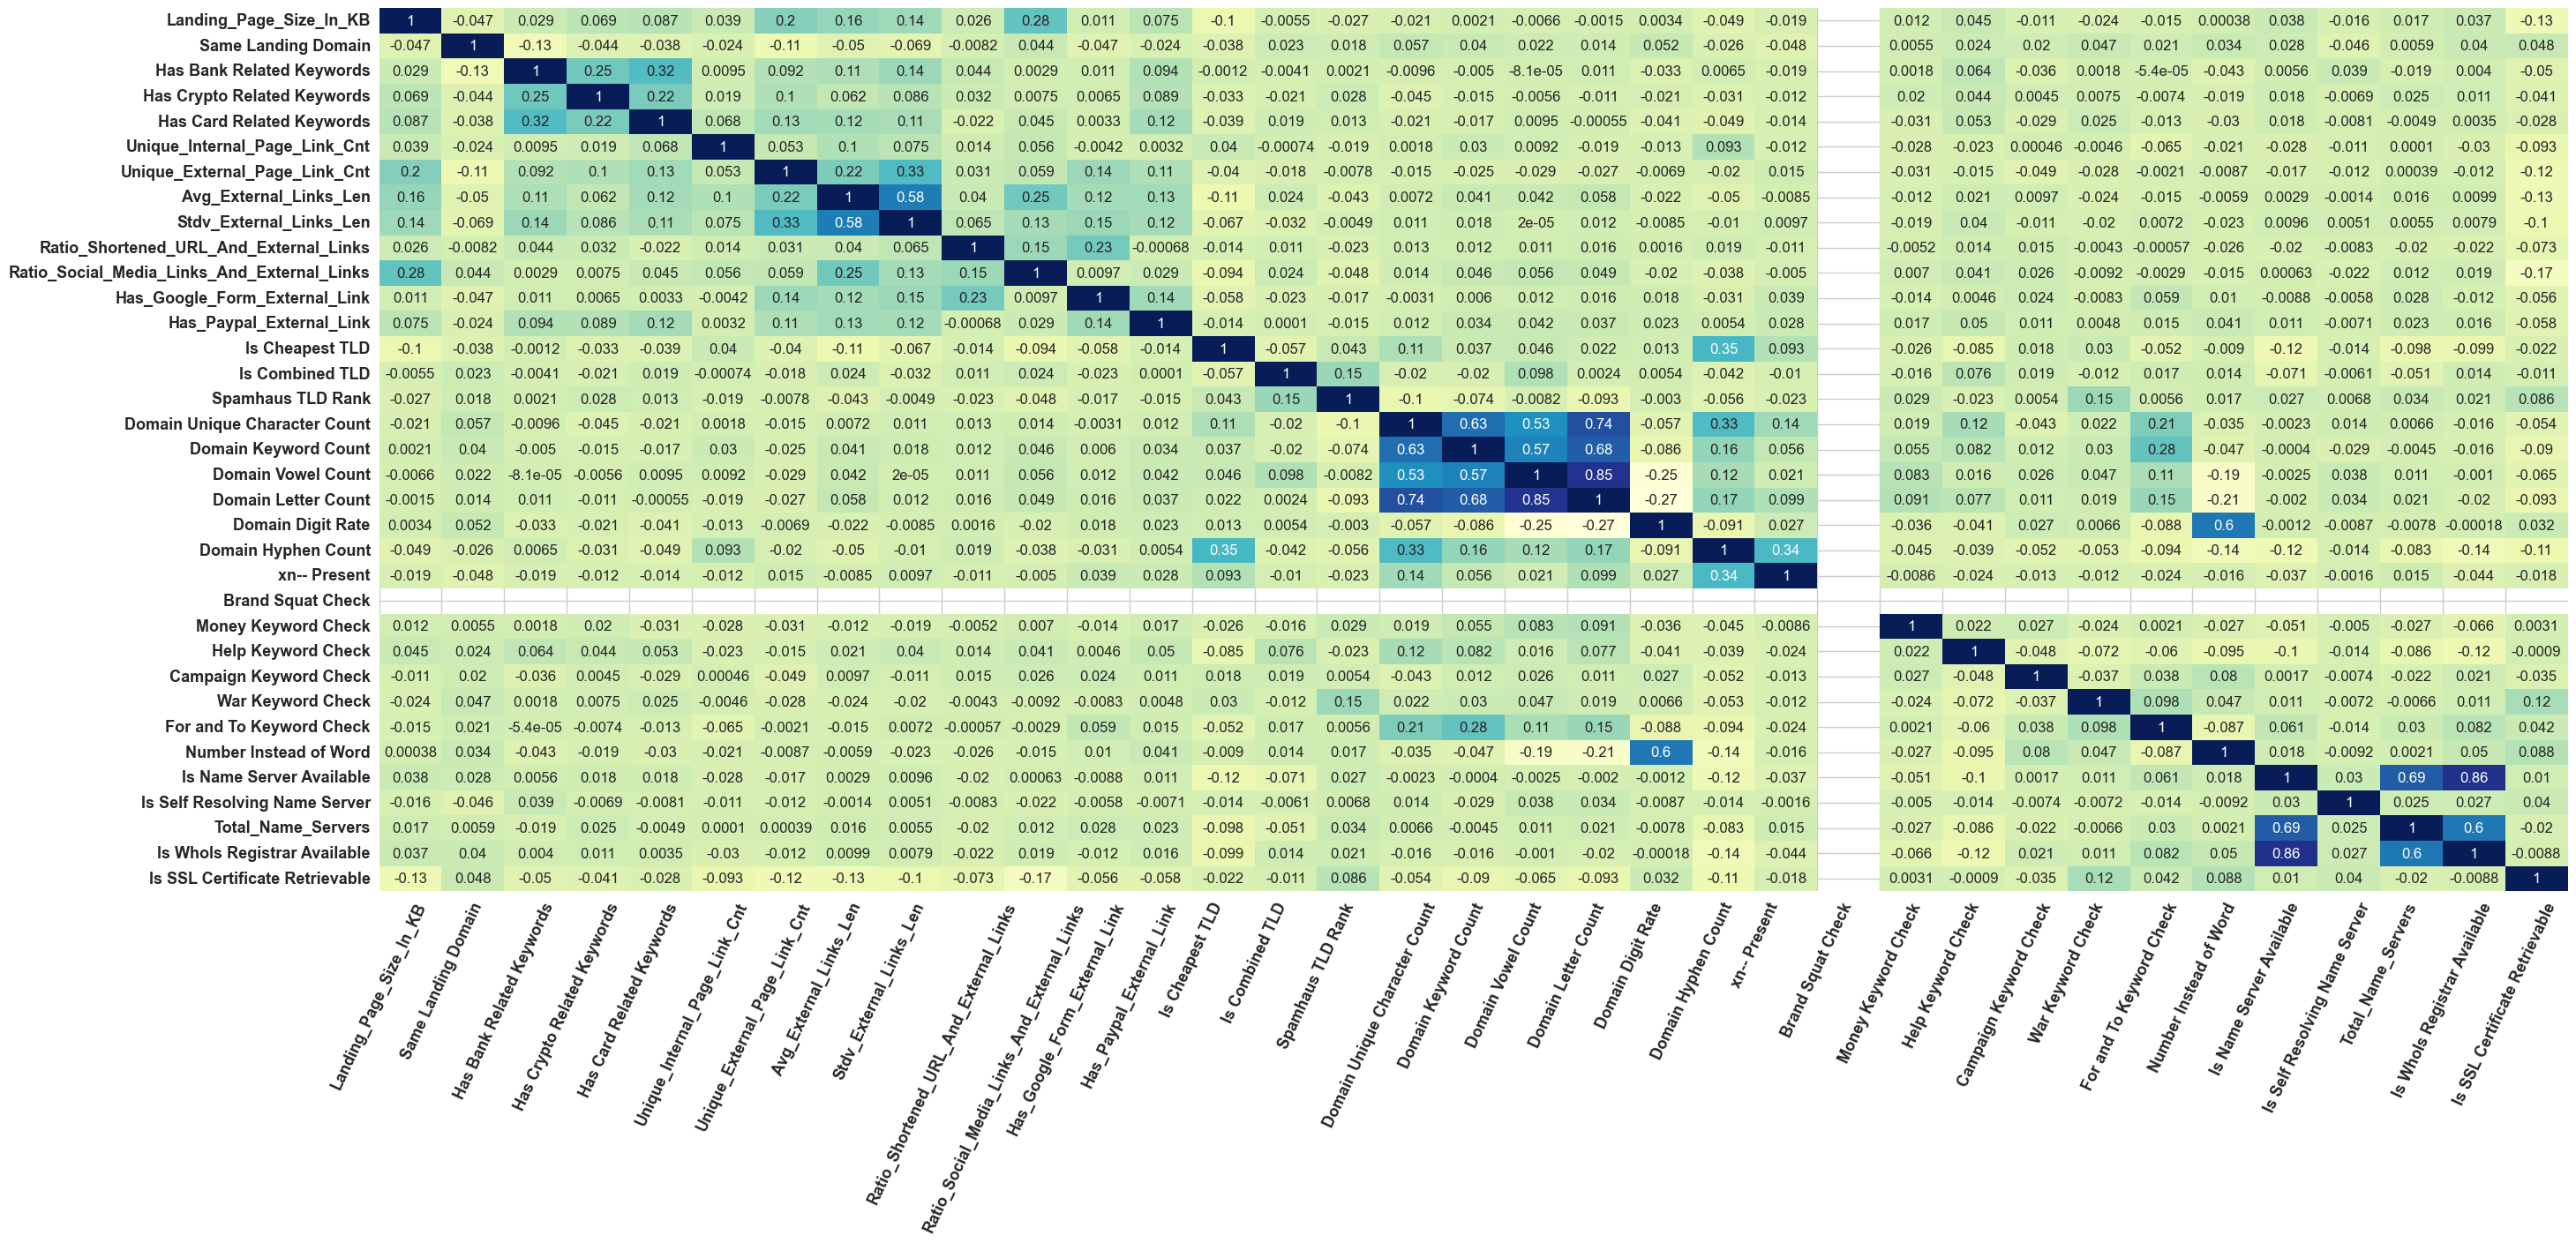

In [13]:
plt.figure(figsize=(32, 13))
ax = sns.heatmap(df.corr(method='pearson', min_periods=1, numeric_only=True), cmap="YlGnBu", annot=True, cbar=False)
ax.set_xticks(ticks=[i for i in range(len(df.columns))],labels=ax.get_xticklabels(),rotation=65)
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold',fontsize=13)
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold',fontsize=13)
plt.show()
plt.close()

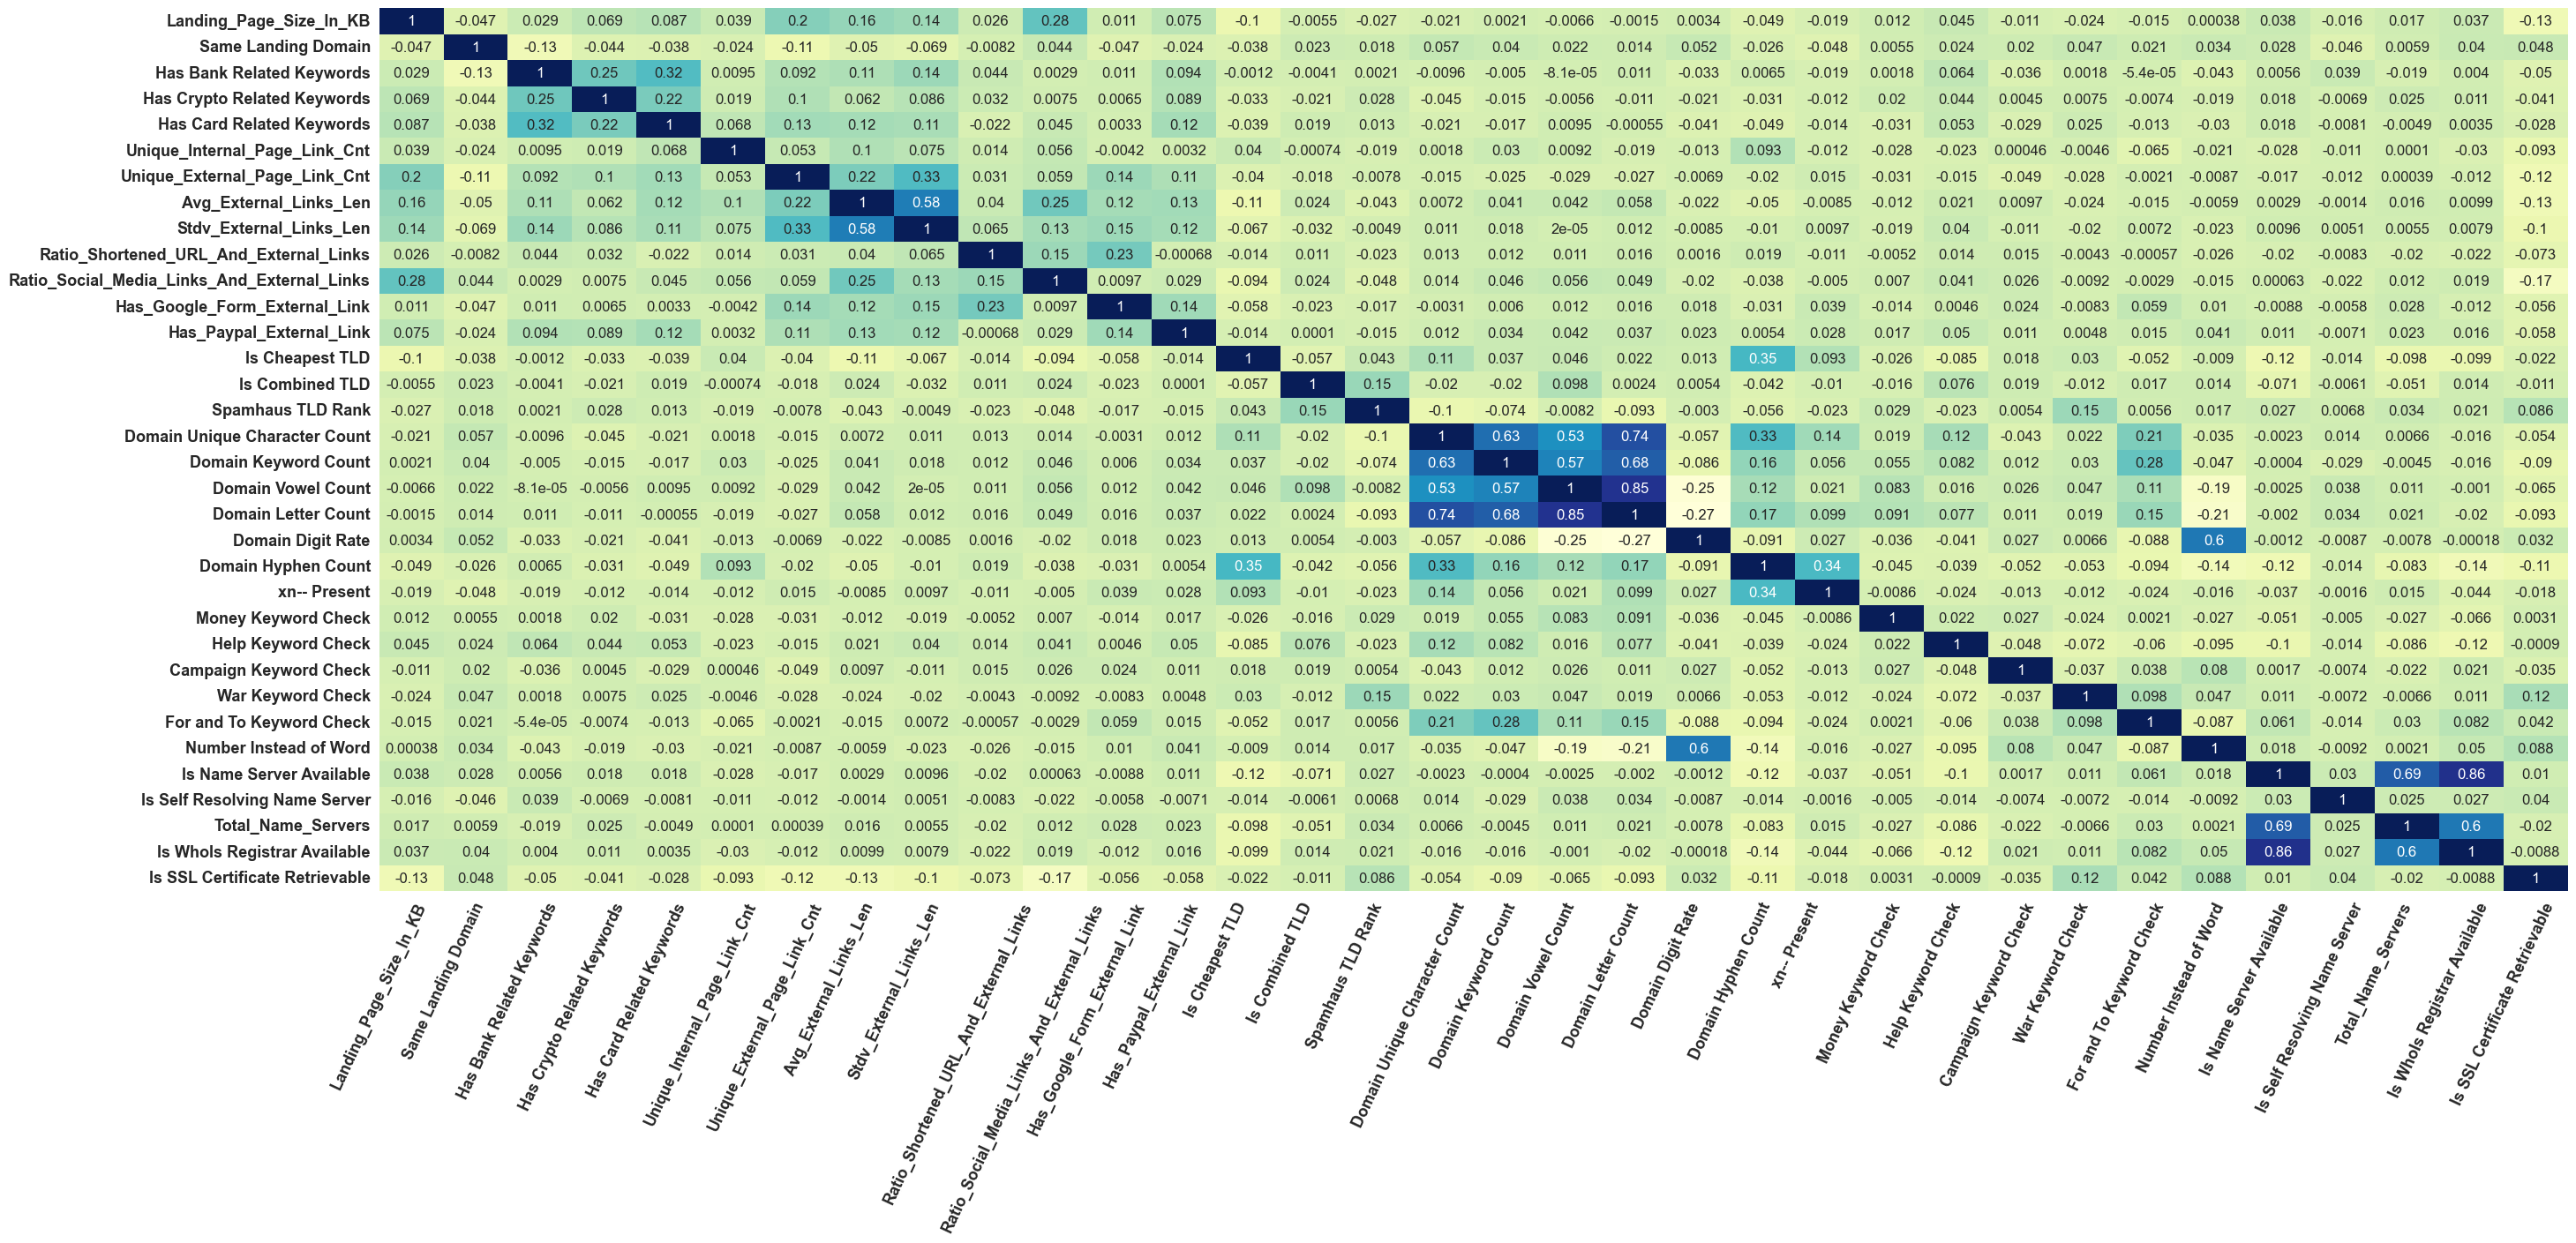

In [14]:
df = df.drop(columns=['Brand Squat Check'], axis=1)
plt.figure(figsize=(32, 13))
ax = sns.heatmap(df.corr(method='pearson', min_periods=1, numeric_only=True), cmap="YlGnBu", annot=True, cbar=False)
ax.set_xticks(ticks=[i for i in range(len(df.columns))],labels=ax.get_xticklabels(),rotation=65)
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold',fontsize=13)
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold',fontsize=13)
plt.show()
plt.close()

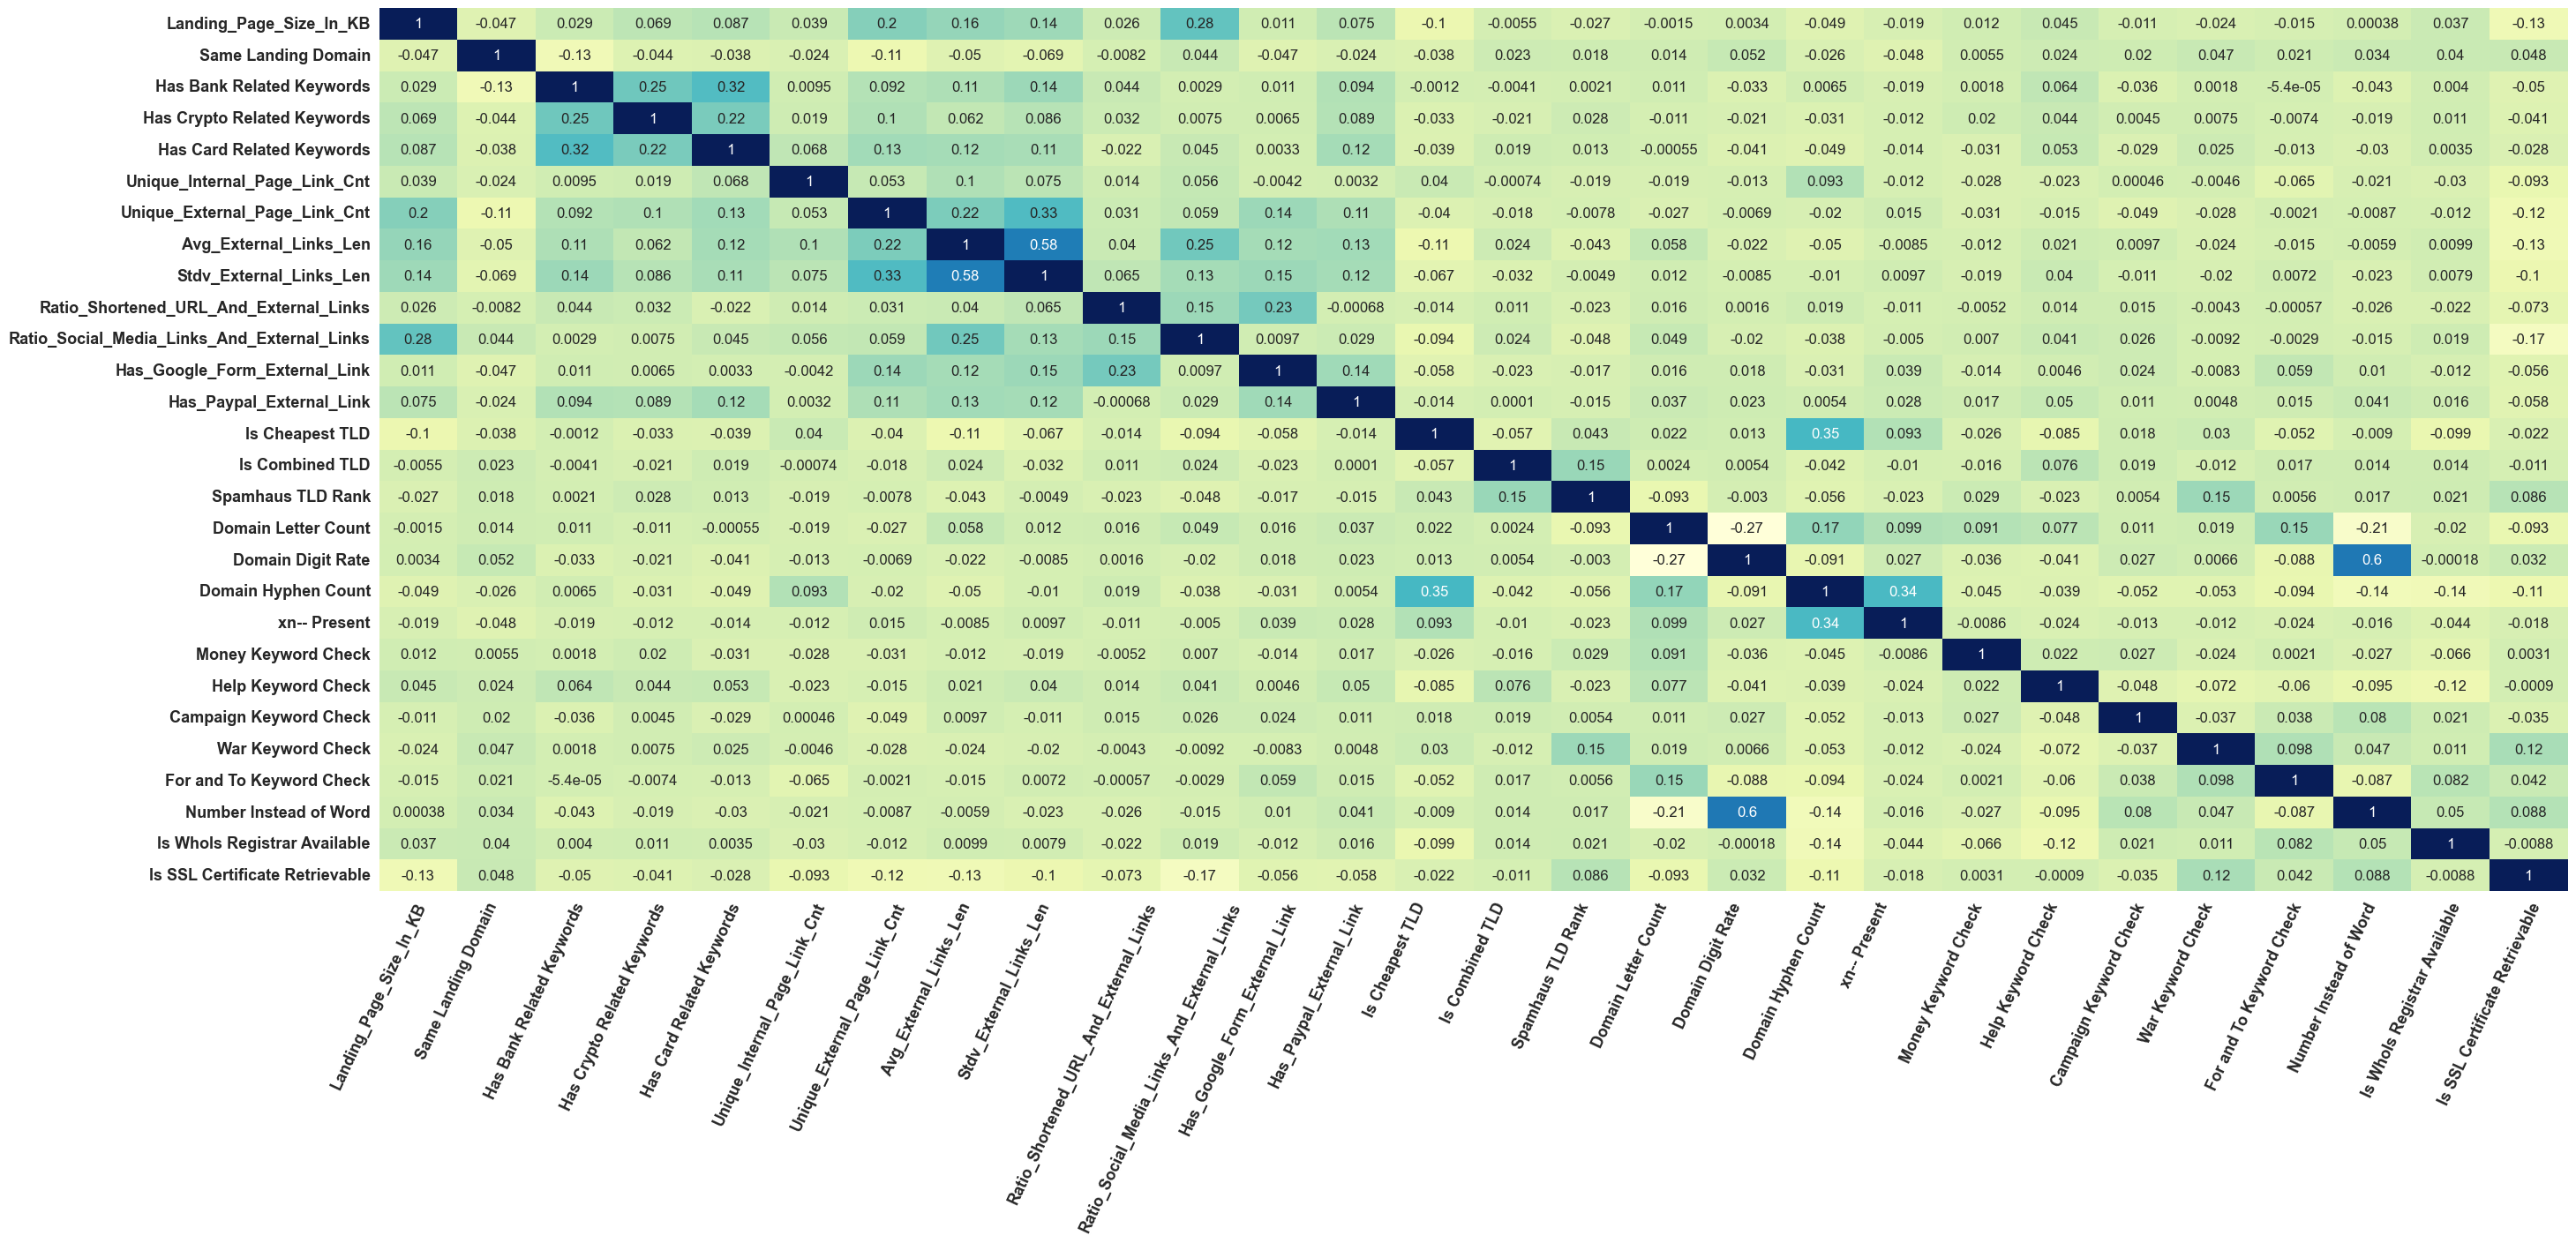

In [15]:
df = df.drop(columns=['Domain Unique Character Count','Domain Keyword Count','Domain Vowel Count','Is Name Server Available','Is Self Resolving Name Server','Total_Name_Servers'], axis=1)
plt.figure(figsize=(32, 13))
ax = sns.heatmap(df.corr(method='pearson', min_periods=1, numeric_only=True), cmap="YlGnBu", annot=True, cbar=False)
ax.set_xticks(ticks=[i for i in range(len(df.columns))],labels=ax.get_xticklabels(),rotation=65)
ax.set_xticklabels(ax.get_xticklabels(), fontweight='bold',fontsize=13)
ax.set_yticklabels(ax.get_yticklabels(), fontweight='bold',fontsize=13)
plt.show()
plt.close()

In [16]:
print(len(df.columns))
dbscan_mincluster = len(df.columns)*2

28


In [17]:
df.head()

Landing_Page_Size_In_KB  Same Landing Domain  Has Bank Related Keywords  \
0                    86.53                    1                          0   
1                   123.73                    1                          0   
2                    96.91                    1                          0   
3                  1170.81                    1                          0   
4                    47.44                    1                          0   

   Has Crypto Related Keywords  Has Card Related Keywords  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Unique_Internal_Page_Link_Cnt  Unique_External_Page_Link_Cnt  \
0                              7                              5   
1                             15                              2   
2                              2                              3   
3                              1                             14   
4                             25                             19   

   Avg_External_Links_Len  Stdv_External_Links_Len  \
0                   50.80                    10.26   
1                   75.50                    32.50   
2                   43.00                     5.10   
3                   45.43                    24.74   
4                   29.11                    17.09   

   Ratio_Shortened_URL_And_External_Links  ...  Domain Hyphen Count  \
0                                     0.0  ...                    0   
1                                     0.0  ...                    0   
2                                     0.0  ...                    0   
3                                     0.0  ...                    0   
4                                     0.0  ...                    0   

   xn-- Present  Money Keyword Check  Help Keyword Check  \
0             0                    0                   0   
1             0                    0                   0   
2             0                    0                   0   
3             0                    0                   0   
4             0                    0                   0   

   Campaign Keyword Check  War Keyword Check  For and To Keyword Check  \
0                       0                  0                         1   
1                       0                  0                         1   
2                       0                  0                         0   
3                       0                  0                         1   
4                       0                  0                         0   

   Number Instead of Word  Is WhoIs Registrar Available  \
0                       0                             1   
1                       0                             1   
2                       0                             0   
3                       0                             1   
4                       0                             0   

   Is SSL Certificate Retrievable  
0                               0  
1                               0  
2                               1  
3                               0  
4                               0  

[5 rows x 28 columns]

In [18]:
normalized_data = normalize(df)

In [19]:
# # Use the quick method and immediately show the figure
# kelbow_visualizer(KMeans(random_state=42), normalized_data, k=(2,11), metric='calinski_harabasz', timings=False)


In [20]:
# Use the quick method and immediately show the figure
# kelbow_visualizer(KMedoids(random_state=42), normalized_data, k=(2,11), metric='calinski_harabasz', timings=False)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

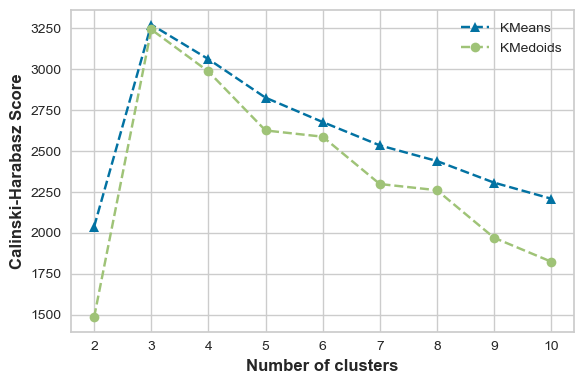

In [21]:
# from sklearn.cluster import KMeans
# from sklearn_extra.cluster import KMedoids
# from sklearn.metrics import calinski_harabasz_score
# import matplotlib.pyplot as plt

def elbow_kmeans_kmedoids_single_plot(data, cluster_range=(2, 10)):
    kmeans_scores = []
    kmedoids_scores = []
    
    # Iterate over the range of cluster numbers
    for n_clusters in range(cluster_range[0], cluster_range[1] + 1):
        # KMeans
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(data)
        kmeans_scores.append(calinski_harabasz_score(data, kmeans_labels))
        
        # KMedoids
        kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
        kmedoids_labels = kmedoids.fit_predict(data)
        kmedoids_scores.append(calinski_harabasz_score(data, kmedoids_labels))
    
    # Plot the elbow graph for both KMeans and KMedoids
    plt.figure(figsize=(6, 4))
    
    # Plot KMeans curve
    plt.plot(range(cluster_range[0], cluster_range[1] + 1), kmeans_scores, marker='^', linestyle='--', color='b', label='KMeans')
    
    # Plot KMedoids curve
    plt.plot(range(cluster_range[0], cluster_range[1] + 1), kmedoids_scores, marker='o', linestyle='--', color='g', label='KMedoids')
    
    # Add title and labels
    # plt.title('Elbow Method Comparison (Calinski-Harabasz Score)')
    plt.xlabel('Number of clusters', fontsize=12, fontweight='bold')
    plt.ylabel('Calinski-Harabasz Score', fontsize=12, fontweight='bold')
    
    # Add grid and legend
    plt.grid(True)
    plt.legend()
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Apply normalization before passing data
elbow_kmeans_kmedoids_single_plot(normalized_data, cluster_range=(2, 10))


C:\Users\mmia43\AppData\Local\Temp\ipykernel_17412\2066074018.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(gower_dist, method='ward')
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


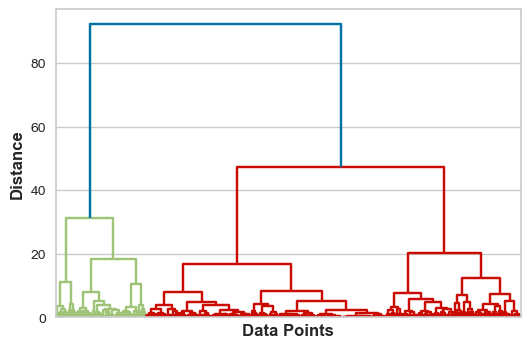

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


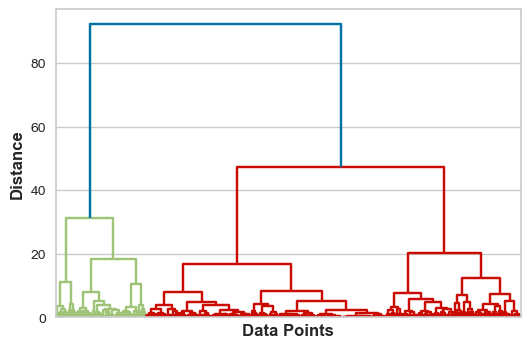

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


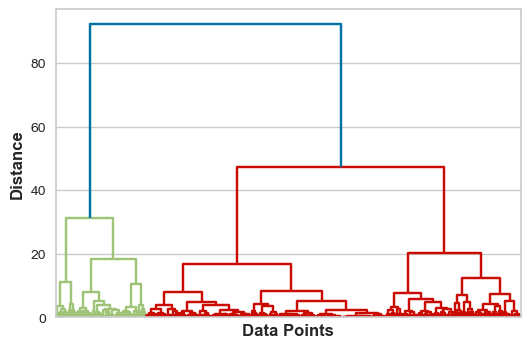

In [22]:
def gower_matrix(X):
    """Compute the Gower distance matrix."""
    return gower.gower_matrix(X)

def hierarchical_clustering(data, n_clusters):
    """Perform hierarchical clustering using Gower distance."""
    gower_dist = gower_matrix(data)
    linkage_matrix = linkage(gower_dist, method='ward')
    clusters = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    return clusters, linkage_matrix

def plot_dendrogram_with_cutoff(linkage_matrix):
    
    # Create a new figure
    plt.figure(figsize=(6,4))
    
    # Plot dendrogram
    dn = dendrogram(linkage_matrix,
            orientation='top',
            distance_sort='ascending',
            show_leaf_counts=False)
    

    # Hide x-axis labels and ticks
    plt.xticks([])
    plt.xlabel('')
    
    # Set y-axis label and title
    plt.ylabel('Distance', fontsize=12, fontweight='bold')
    plt.xlabel('Data Points', fontsize=12, fontweight='bold')
    plt.legend()
    
    plt.show()


_, linkage_matrix1 = hierarchical_clustering(normalized_data, n_clusters=3)
_, linkage_matrix2 = hierarchical_clustering(normalized_data, n_clusters=4)
_, linkage_matrix3 = hierarchical_clustering(normalized_data, n_clusters=5)
plot_dendrogram_with_cutoff(linkage_matrix1)
plot_dendrogram_with_cutoff(linkage_matrix2)
plot_dendrogram_with_cutoff(linkage_matrix3)

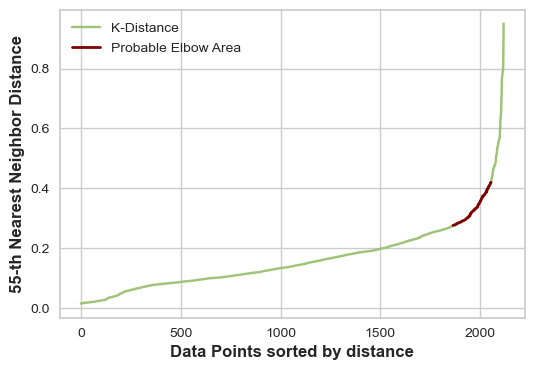

In [23]:
# from sklearn.neighbors import NearestNeighbors
# from sklearn.preprocessing import normalize
# import matplotlib.pyplot as plt
# import numpy as np

def plot_k_distance(data, k=5, highlight_range=(0.1, 0.2)):
   
    neighbors = NearestNeighbors(n_neighbors=k)
    neighbors_fit = neighbors.fit(data)
    distances, indices = neighbors_fit.kneighbors(data)
    
    # Distance to the k-th nearest neighbor
    distances = np.sort(distances[:, k-1], axis=0)
    
    # Identify the indices where distances fall within the highlight range
    within_range = (distances >= highlight_range[0]) & (distances <= highlight_range[1])
    highlight_indices = np.where(within_range)[0]
    
    plt.figure(figsize=(6,4))

    # Plot the K-Distance Graph
    # plt.figure(figsize=(10, 6))
    plt.plot(distances, label='K-Distance', color='g')
    
    # Highlight the specified y-value range on the curve
    if highlight_indices.size > 0:
        plt.plot(highlight_indices, distances[highlight_indices], color='maroon', linewidth=2, label='Probable Elbow Area')
    

    # plt.title('K-Distance Graph')
    plt.xlabel('Data Points sorted by distance', fontsize=12, fontweight='bold')
    plt.ylabel(f'{k}-th Nearest Neighbor Distance', fontsize=12, fontweight='bold')
    plt.grid(True)
    plt.legend()
    plt.show()


plot_k_distance(normalized_data, k=dbscan_mincluster-1, highlight_range=(0.275, 0.425))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

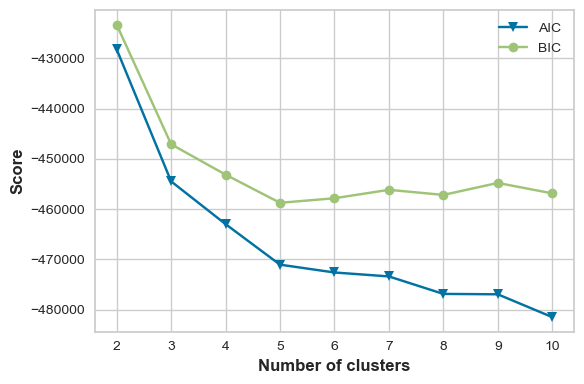

In [24]:
def plot_gmm_aic_bic(X, n_components_range, random_state=None):
    """
    Plot AIC and BIC scores for different numbers of clusters using Gaussian Mixture Model (GMM).

    Parameters:
    - X: array-like, shape (n_samples, n_features), dataset to cluster.
    - n_components_range: list or array, range of n_components to try for GMM.
    - random_state: int or None, random seed for reproducibility.
    """
    aic = []
    bic = []
    
    # Fit GMM for each n_components and store AIC/BIC scores
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, random_state=random_state)
        gmm.fit(X)
        aic.append(gmm.aic(X))
        bic.append(gmm.bic(X))
    
    plt.figure(figsize=(6,4))
    # Plot the AIC/BIC scores
    plt.plot(n_components_range, aic, label='AIC', marker='v')
    plt.plot(n_components_range, bic, label='BIC', marker='o')
    
    # # Highlight the minimum points for AIC/BIC
    # plt.scatter(n_components_range[np.argmin(aic)], min(aic), color='blue', s=100, zorder=5, label='Best AIC')
    # plt.scatter(n_components_range[np.argmin(bic)], min(bic), color='green', s=100, zorder=5, label='Best BIC')
    
    # Labels and title
    plt.xlabel('Number of clusters',fontsize=12, fontweight='bold')
    plt.ylabel('Score', fontsize=12, fontweight='bold')
    # plt.title('AIC and BIC for GMM')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Show plot
    plt.show()


plot_gmm_aic_bic(normalized_data, range(2,11), random_state=42)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\mmia43\AppData\Local\Temp\ipykernel_17412\2627398734.py:31: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(gower_dist, method='ward')
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks 

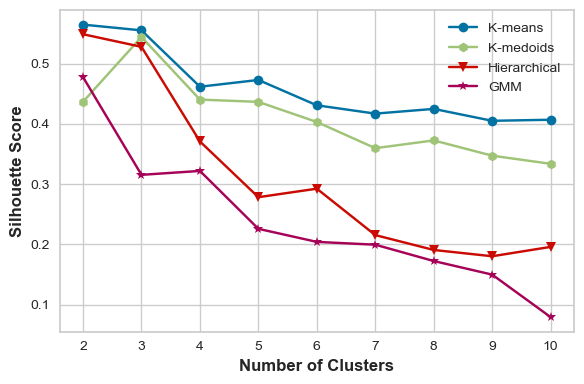

In [25]:
def silhouette_analysis_comparison(data, cluster_range=(2, 11), figsize=(6, 4)):

    kmeans_scores = []
    kmedoids_scores = []
    hierarchical_scores = []
    dbscan_scores = []
    gmm_scores = []

    eps_list = [0.2,0.225,0.25,0.265,0.275,0.285,0.3,0.325,0.34,0.35]
    min_list = [15,20,25,30,35,40,45,50,55,58]

    # Range of clusters to test
    n_clusters_range = range(cluster_range[0], cluster_range[1])

    for n_clusters in n_clusters_range:
        # K-means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans_labels = kmeans.fit_predict(data)
        kmeans_score = silhouette_score(data, kmeans_labels)
        kmeans_scores.append(kmeans_score)

        # K-medoids
        kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
        kmedoids_labels = kmedoids.fit_predict(data)
        kmedoids_score = silhouette_score(data, kmedoids_labels)
        kmedoids_scores.append(kmedoids_score)


        gower_dist = gower_matrix(data)
    
        linkage_matrix = linkage(gower_dist, method='ward')
        hierarchical_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
        hierarchical_score = silhouette_score(data, hierarchical_labels)
        hierarchical_scores.append(hierarchical_score)

        # # DBSCAN (needs a reasonable epsilon value; here, we use the median distance for demonstration)
        # dbscan = DBSCAN(eps=eps_list[n_clusters-2], min_samples=min_list[n_clusters-2])
        # dbscan_labels = dbscan.fit_predict(data)
        # # DBSCAN can produce -1 labels for noise, so ignore these
        # # if len(set(dbscan_labels)) > 1:
        # #     dbscan_score = silhouette_score(data, dbscan_labels[dbscan_labels != -1])
        # # else:
        # #     dbscan_score = -1

        # if -1 in dbscan_labels:
        #     dbscan_labels[dbscan_labels == -1] = 2

        # dbscan_score = silhouette_score(data, dbscan_labels)
        # dbscan_scores.append(dbscan_score)

        # GMM
        gmm = GaussianMixture(n_components=n_clusters, random_state=42)
        gmm_labels = gmm.fit_predict(data)
        gmm_score = silhouette_score(data, gmm_labels)
        gmm_scores.append(gmm_score)

    # Plotting the results
    plt.figure(figsize=figsize)
    plt.plot(n_clusters_range, kmeans_scores, label='K-means', marker='o')
    plt.plot(n_clusters_range, kmedoids_scores, label='K-medoids', marker='h')
    plt.plot(n_clusters_range, hierarchical_scores, label='Hierarchical', marker='v')
    # plt.plot(n_clusters_range, dbscan_scores, label='DBSCAN', marker='o')
    plt.plot(n_clusters_range, gmm_scores, label='GMM', marker='*')

    plt.xlabel('Number of Clusters', fontsize=12, fontweight='bold')
    plt.ylabel('Silhouette Score', fontsize=12, fontweight='bold')
    # plt.title('Silhouette Scores for Different Clustering Algorithms', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming your dataset is loaded into a variable `df` and you're excluding the first column:
# normalized_data = normalize(df)  # Apply normalization before passing data
silhouette_analysis_comparison(normalized_data, cluster_range=(2, 11))

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

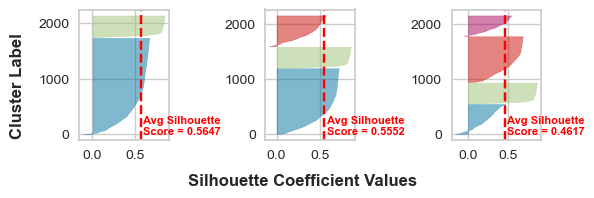

In [26]:
def silhouette_analysis_kmeans(data, cluster_range=(2, 5), figsize=(6, 2)):

    # Number of plots needed
    num_plots = len(range(cluster_range[0], cluster_range[1]))
    fig, ax = plt.subplots((num_plots + 1) // 3, 3, figsize=figsize)
    
    # Flatten the axis array if needed to make it easier to index
    ax = ax.flatten() if num_plots > 1 else [ax]

    # Iterate over the specified range of clusters
    for i, n_clusters in enumerate(range(cluster_range[0], cluster_range[1])):
        model = KMeans(n_clusters=n_clusters, random_state=42)
        
        # Create SilhouetteVisualizer instance and fit
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[i])
        visualizer.fit(data)
        
        # Add average line, text, and legend only if not already added
        avg_score = visualizer.silhouette_score_
        # ax[i].axvline(x=avg_score, color='red', linestyle='--', label=f'Avg Silhouette Score: {avg_score:.2f}')
        ax[i].text(avg_score + .025, 150, f'Avg Silhouette\nScore = {avg_score:.4f}', color='red', ha='left', va='center', fontsize=8, fontweight='bold')
        # ax[i].legend(loc='best')
    
    # Add overall labels and title with bold text
    fig.text(0.5, 0.025, 'Silhouette Coefficient Values', ha='center', va='center', fontsize=12, fontweight='bold')
    fig.text(0.025, 0.5, 'Cluster Label', ha='center', va='center', rotation='vertical', fontsize=12, fontweight='bold')
    
    plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.97])  # Adjust the layout to fit the labels
    plt.show()

# Apply normalization before passing data
silhouette_analysis_kmeans(normalized_data, cluster_range=(2, 5))


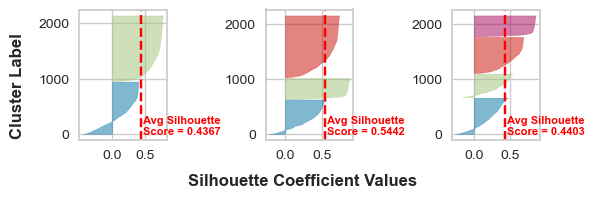

In [27]:
def silhouette_analysis_kmedoids(data, cluster_range=(2, 5), figsize=(6, 2)):

    # Number of plots needed
    num_plots = len(range(cluster_range[0], cluster_range[1]))
    fig, ax = plt.subplots((num_plots + 1) // 3, 3, figsize=figsize)
    
    # Flatten the axis array if needed to make it easier to index
    ax = ax.flatten() if num_plots > 1 else [ax]

    # Iterate over the specified range of clusters
    for i, n_clusters in enumerate(range(cluster_range[0], cluster_range[1])):
        model = KMedoids(n_clusters=n_clusters, random_state=42)
        
        # Create SilhouetteVisualizer instance and fit
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[i])
        visualizer.fit(data)
        
        # Add average line, text, and legend only if not already added
        avg_score = visualizer.silhouette_score_
        # ax[i].axvline(x=avg_score, color='red', linestyle='--', label=f'Avg Silhouette Score: {avg_score:.2f}')
        ax[i].text(avg_score + .025, 150, f'Avg Silhouette\nScore = {avg_score:.4f}', color='red', ha='left', va='center', fontsize=8, fontweight='bold')
        # ax[i].legend(loc='best')
    
    # Add overall labels and title with bold text
    fig.text(0.5, 0.025, 'Silhouette Coefficient Values', ha='center', va='center', fontsize=12, fontweight='bold')
    fig.text(0.025, 0.5, 'Cluster Label', ha='center', va='center', rotation='vertical', fontsize=12, fontweight='bold')
    
    plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.97])  # Adjust the layout to fit the labels
    plt.show()

# Apply normalization before passing data
silhouette_analysis_kmedoids(normalized_data, cluster_range=(2, 5))

C:\Users\mmia43\AppData\Local\Temp\ipykernel_17412\3527570274.py:9: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(gower_dist, method='ward')


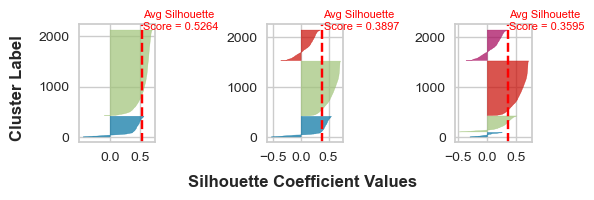

In [28]:
def silhouette_analysis_hierar(data, cluster_range=(2, 5), figsize=(6, 2)):
    """
    Perform silhouette analysis using hierarchical clustering with Gower distance and Yellowbrick color palette.
    """
    # Compute Gower distance matrix
    gower_dist = gower.gower_matrix(data)
    
    # Perform hierarchical clustering using Ward's method
    linkage_matrix = linkage(gower_dist, method='ward')

    # Number of plots needed
    num_plots = len(range(cluster_range[0], cluster_range[1]))
    fig, ax = plt.subplots((num_plots + 2) // 3, 3, figsize=figsize)
    
    # Flatten the axis array if needed to make it easier to index
    ax = ax.flatten() if num_plots > 1 else [ax]

    # Get the Yellowbrick color palette
    yellowbrick_colors = PALETTES['yellowbrick']

    # Iterate over the specified range of clusters
    for i, n_clusters in enumerate(range(cluster_range[0], cluster_range[1])):
        # Perform clustering for the current number of clusters
        labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
        
        # Compute the silhouette score and silhouette samples
        silhouette_avg = silhouette_score(gower_dist, labels, metric='precomputed')
        silhouette_values = silhouette_samples(gower_dist, labels, metric='precomputed')

        # Plot silhouette values
        y_lower = 10
        for j in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster j
            ith_cluster_silhouette_values = silhouette_values[labels == (j + 1)]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_j = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j
            
            color = yellowbrick_colors[j % len(yellowbrick_colors)]  # Use Yellowbrick color palette
            ax[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
            
            # Label the silhouette plots with the cluster number at the center
            # ax[i].text(-0.05, y_lower + 0.5 * size_cluster_j, str(j + 1))
            
            y_lower = y_upper + 10  # 10 for the space between silhouette plots

        # Draw vertical line for average silhouette score
        ax[i].axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Avg Silhouette = {silhouette_avg:.2f}')
        # ax[i].set_title(f"n_clusters = {n_clusters}")
        # ax[i].set_xlabel("Silhouette Coefficient")
        # ax[i].set_ylabel("Cluster Label")
        
        # Annotate the average silhouette score
        ax[i].text(silhouette_avg + 0.02, y_upper, f'Avg Silhouette\nScore = {silhouette_avg:.4f}', color='red', fontsize=8)

    # Hide any unused subplots
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    # Add overall labels and title with bold text
    fig.text(0.5, 0.025, 'Silhouette Coefficient Values', ha='center', va='center', fontsize=12, fontweight='bold')
    fig.text(0.025, 0.5, 'Cluster Label', ha='center', va='center', rotation='vertical', fontsize=12, fontweight='bold')
    
    plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.97])  # Adjust the layout to fit the labels
    plt.show()


# Example usage:
silhouette_analysis_hierar(normalized_data, cluster_range=(2, 5))


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


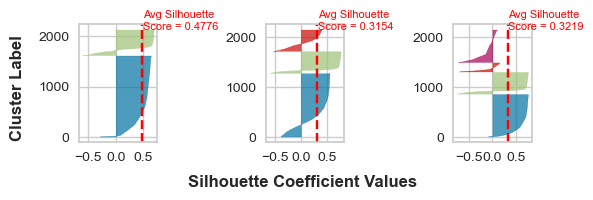

In [29]:
def silhouette_analysis_gmm(data, cluster_range=(2, 5), figsize=(6, 2)):

    # Number of plots needed
    num_plots = len(range(cluster_range[0], cluster_range[1]))
    fig, ax = plt.subplots((num_plots + 2) // 3, 3, figsize=figsize)
    
    # Flatten the axis array if needed to make it easier to index
    ax = ax.flatten() if num_plots > 1 else [ax]

    # Get Yellowbrick color palette
    yellowbrick_colors = PALETTES['yellowbrick']

    # Iterate over the specified range of clusters
    for i, n_clusters in enumerate(range(cluster_range[0], cluster_range[1])):
        # Fit the GMM model
        model = GaussianMixture(n_components=n_clusters, random_state=42)
        model.fit(data)
        cluster_labels = model.predict(data)
        
        # Compute the silhouette score and silhouette samples
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_values = silhouette_samples(data, cluster_labels)
        
        # Plot silhouette values
        y_lower = 10
        for j in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to cluster j
            ith_cluster_silhouette_values = silhouette_values[cluster_labels == j]
            ith_cluster_silhouette_values.sort()
            
            size_cluster_j = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_j
            
            color = yellowbrick_colors[j % len(yellowbrick_colors)]  # Use Yellowbrick color palette
            ax[i].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

            
            y_lower = y_upper + 10  # 10 for the space between silhouette plots

        # Draw vertical line for average silhouette score
        ax[i].axvline(x=silhouette_avg, color="red", linestyle="--", label=f'Avg Silhouette = {silhouette_avg:.2f}')
        # Annotate the average silhouette score
        ax[i].text(silhouette_avg + 0.02, y_upper, f'Avg Silhouette\nScore = {silhouette_avg:.4f}', color='red', fontsize=8)

    # Hide any unused subplots
    for j in range(i + 1, len(ax)):
        fig.delaxes(ax[j])

    # Add overall labels and title with bold text
    fig.text(0.5, 0.025, 'Silhouette Coefficient Values', ha='center', va='center', fontsize=12, fontweight='bold')
    fig.text(0.025, 0.5, 'Cluster Label', ha='center', va='center', rotation='vertical', fontsize=12, fontweight='bold')
    
    plt.tight_layout(rect=[0.03, 0.03, 0.97, 0.97])  # Adjust the layout to fit the labels
    plt.show()

# Apply normalization before passing data
silhouette_analysis_gmm(normalized_data, cluster_range=(2, 5))


In [30]:
dbscan_eps = 0.35

In [31]:
clusters_kmeans, kmeans_model = kmeans_clustering(normalized_data, n_clusters=3)
clusters_kmedoids, kmedoids_model = kmedoids_clustering(normalized_data, n_clusters=3)
clusters_hierarchical, hierarchical_model = hierarchical_clustering(normalized_data, n_clusters=3)
clusters_dbscan, dbscan_model = dbscan_clustering(normalized_data, eps=dbscan_eps, min_samples=dbscan_mincluster)
clusters_gmm, gmm_model = gmm_clustering(normalized_data, n_clusters=3)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(
C:\Users\mmia43\AppData\Local\Temp\ipykernel_17412\2066074018.py:8: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage_matrix = linkage(gower_dist, method='ward')
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

In [32]:
# if -1 in clusters_dbscan:
#     clusters_dbscan[clusters_dbscan == -1] = 2

# clusters_hierarchical[clusters_hierarchical == 0] = 2
# clusters_hierarchical[clusters_hierarchical == 1] = 0
# clusters_hierarchical[clusters_hierarchical == 2] = 1

In [33]:
print(np.unique(clusters_kmeans))
print(np.unique(clusters_kmedoids))
print(np.unique(clusters_hierarchical))
print(np.unique(clusters_dbscan))
print(np.unique(clusters_gmm))

[0 1 2]
[0 1 2]
[1 2 3]
[-1  0  1]
[0 1 2]


In [34]:
df['K-means Label'] = list(clusters_kmeans)
df['KMedoids Label'] = list(clusters_kmedoids)
df['Hierarchical Label'] = list(clusters_hierarchical)
df['DBSCAN Label'] = list(clusters_dbscan)
df['GMM Label'] = list(clusters_gmm)

In [35]:
data['K-means Label'] = list(clusters_kmeans)
data['KMedoids Label'] = list(clusters_kmedoids)
data['Hierarchical Label'] = list(clusters_hierarchical)
data['DBSCAN Label'] = list(clusters_dbscan)
data['GMM Label'] = list(clusters_gmm)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2118 entries, 0 to 2117
Data columns (total 33 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Landing_Page_Size_In_KB                      2118 non-null   float64
 1   Same Landing Domain                          2118 non-null   int64  
 2   Has Bank Related Keywords                    2118 non-null   int64  
 3   Has Crypto Related Keywords                  2118 non-null   int64  
 4   Has Card Related Keywords                    2118 non-null   int64  
 5   Unique_Internal_Page_Link_Cnt                2118 non-null   int64  
 6   Unique_External_Page_Link_Cnt                2118 non-null   int64  
 7   Avg_External_Links_Len                       2118 non-null   float64
 8   Stdv_External_Links_Len                      2118 non-null   float64
 9   Ratio_Shortened_URL_And_External_Links       2118 non-null   float64
 10  

In [37]:
ipqs_data = pd.read_csv("../Data/all_active_URLS_IPQS_analysis.csv")
ipqs_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880 entries, 0 to 2879
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   url          2880 non-null   object
 1   unsafe       2880 non-null   bool  
 2   status_code  2880 non-null   int64 
 3   parking      2880 non-null   bool  
 4   spamming     2880 non-null   bool  
 5   malware      2880 non-null   bool  
 6   phishing     2880 non-null   bool  
 7   suspicious   2880 non-null   bool  
 8   adult        2880 non-null   bool  
 9   risk_score   2880 non-null   int64 
dtypes: bool(7), int64(2), object(1)
memory usage: 87.3+ KB


In [38]:
risk_score = 74

In [39]:
ipqs_flag_column = []
def cluster_analysis(cluster_label_name):

    global ipqs_flag_column

    print('Analysis For Cluster ', cluster_label_name)
    print('-'*35)

    URL_dict = {}

    URL = list(data['FQDN'])

    for i in range(len(URL)):
        URL_dict[URL[i]] = [data[cluster_label_name][i],0]


    #if risk_score>74 and one of the flag is true then append 1 means IPQS flagged as malicious
    for i in range(len(ipqs_data)):
        if ipqs_data.iloc[i]['url'] in URL_dict:
            if ((ipqs_data.iloc[i]['risk_score']>risk_score) and (ipqs_data.iloc[i]['suspicious']==1) or (ipqs_data.iloc[i]['malware']==1) or (ipqs_data.iloc[i]['phishing']==1) or (ipqs_data.iloc[i]['spamming']==1)):
                URL_dict[ipqs_data.iloc[i]['url']][1] = 1


    label_dict = dict(data[cluster_label_name].value_counts())

    group_wise_malicious_cnt = {}
    for i in list(set(data[cluster_label_name])):
        group_wise_malicious_cnt[i] = 0

    if len(ipqs_flag_column)<len(data):
        for i in URL_dict:
            ipqs_flag_column.append(URL_dict[i][1])

    for i in URL_dict:
        if URL_dict[i][1]:
            group_wise_malicious_cnt[URL_dict[i][0]] += 1

    xxx = label_dict
    label_dict = {}
    for i in group_wise_malicious_cnt:
        label_dict[i] = xxx[i]

    print('Cluster Distribution')
    print(label_dict)

    print('Malicious count in i th cluster')
    print(group_wise_malicious_cnt)

    new_percent = [round(100*group_wise_malicious_cnt[i]/label_dict[i],2) for i in group_wise_malicious_cnt]

    print('Malicious percentage in i th cluster')
    print(new_percent)
    print('\n')
    return new_percent

In [40]:
malicious_index_kmeans = cluster_analysis('K-means Label') 
malicious_index_kmedoids = cluster_analysis('KMedoids Label')
malicious_index_hierar = cluster_analysis('Hierarchical Label')
malicious_index_dbscan = cluster_analysis('DBSCAN Label')
malicious_index_gmm = cluster_analysis('GMM Label')


Analysis For Cluster  K-means Label
-----------------------------------
Cluster Distribution
{0: 1185, 1: 379, 2: 554}
Malicious count in i th cluster
{0: 137, 1: 261, 2: 112}
Malicious percentage in i th cluster
[11.56, 68.87, 20.22]


Analysis For Cluster  KMedoids Label
-----------------------------------
Cluster Distribution
{0: 1085, 1: 385, 2: 648}
Malicious count in i th cluster
{0: 119, 1: 267, 2: 124}
Malicious percentage in i th cluster
[10.97, 69.35, 19.14]


Analysis For Cluster  Hierarchical Label
-----------------------------------
Cluster Distribution
{1: 412, 2: 1095, 3: 611}
Malicious count in i th cluster
{1: 264, 2: 127, 3: 119}
Malicious percentage in i th cluster
[64.08, 11.6, 19.48]


Analysis For Cluster  DBSCAN Label
-----------------------------------
Cluster Distribution
{0: 1724, 1: 363, -1: 31}
Malicious count in i th cluster
{0: 248, 1: 259, -1: 3}
Malicious percentage in i th cluster
[14.39, 71.35, 9.68]


Analysis For Cluster  GMM Label
------------------

In [41]:
print(malicious_index_kmeans)
print(malicious_index_kmedoids)
print(malicious_index_hierar)
print(malicious_index_dbscan)
print(malicious_index_gmm)

[11.56, 68.87, 20.22]
[10.97, 69.35, 19.14]
[64.08, 11.6, 19.48]
[14.39, 71.35, 9.68]
[11.32, 61.95, 23.58]


In [42]:
data['Hierarchical Label'] = data['Hierarchical Label'].replace({1: 2, 2: 1})
data['Hierarchical Label'] = data['Hierarchical Label'] - 1

np.unique(data['Hierarchical Label'])

array([0, 1, 2])

In [43]:
df['Hierarchical Label'] = df['Hierarchical Label'].replace({1: 2, 2: 1})
df['Hierarchical Label'] = df['Hierarchical Label'] - 1

np.unique(df['Hierarchical Label'])

array([0, 1, 2])

In [44]:
df['Hierarchical Label'].value_counts()

Hierarchical Label
0    1095
2     611
1     412
Name: count, dtype: int64

In [45]:
import numpy as np
from scipy.stats import mode

def majority_voting(clustering_results):
    """
    Perform majority voting to create a final cluster assignment.

    Parameters:
    - clustering_results: A list of 2D arrays or lists where each array represents
                          the cluster labels from one clustering algorithm (shape: n_samples, n_algorithms).

    Returns:
    - final_labels: 1D array of final cluster assignments after majority voting.
    """
    clustering_results = np.array(clustering_results)
    

    final_labels, _ = mode(clustering_results, axis=0)

    return final_labels.flatten()

In [46]:
# clustering_results = [
#     df['K-means Label'],
#     df['KMedoids Label'],
#     df['Hierarchical Label'],
#     df['DBSCAN Label'],
#     df['GMM Label']
# ]


# Excluding the DBSCAN result after the meeting at 10/30/2024

clustering_results = [
    df['K-means Label'],
    df['KMedoids Label'],
    df['Hierarchical Label'],
    df['GMM Label']
]

voting_labels = majority_voting(clustering_results)

df['Majority Voting Label'] = voting_labels
data['Majority Voting Label'] = voting_labels

df.head()

Landing_Page_Size_In_KB  Same Landing Domain  Has Bank Related Keywords  \
0                    86.53                    1                          0   
1                   123.73                    1                          0   
2                    96.91                    1                          0   
3                  1170.81                    1                          0   
4                    47.44                    1                          0   

   Has Crypto Related Keywords  Has Card Related Keywords  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Unique_Internal_Page_Link_Cnt  Unique_External_Page_Link_Cnt  \
0                              7                              5   
1                             15                              2   
2                              2                              3   
3                              1                             14   
4                             25                             19   

   Avg_External_Links_Len  Stdv_External_Links_Len  \
0                   50.80                    10.26   
1                   75.50                    32.50   
2                   43.00                     5.10   
3                   45.43                    24.74   
4                   29.11                    17.09   

   Ratio_Shortened_URL_And_External_Links  ...  For and To Keyword Check  \
0                                     0.0  ...                         1   
1                                     0.0  ...                         1   
2                                     0.0  ...                         0   
3                                     0.0  ...                         1   
4                                     0.0  ...                         0   

   Number Instead of Word  Is WhoIs Registrar Available  \
0                       0                             1   
1                       0                             1   
2                       0                             0   
3                       0                             1   
4                       0                             0   

   Is SSL Certificate Retrievable  K-means Label  KMedoids Label  \
0                               0              0               0   
1                               0              0               0   
2                               1              0               0   
3                               0              0               0   
4                               0              0               2   

   Hierarchical Label  DBSCAN Label  GMM Label  Majority Voting Label  
0                   0             0          0                      0  
1                   0             0          0                      0  
2                   0             0          0                      0  
3                   0             0          0                      0  
4                   2             0          2                      2  

[5 rows x 34 columns]

In [47]:
df['Majority Voting Label'].value_counts()

Majority Voting Label
0    1149
2     581
1     388
Name: count, dtype: int64

In [48]:
malicious_index_kmeans = cluster_analysis('K-means Label') 
malicious_index_kmedoids = cluster_analysis('KMedoids Label')
malicious_index_hierar = cluster_analysis('Hierarchical Label')
malicious_index_dbscan = cluster_analysis('DBSCAN Label')
malicious_index_gmm = cluster_analysis('GMM Label')
malicious_index_voting = cluster_analysis('Majority Voting Label')

Analysis For Cluster  K-means Label
-----------------------------------
Cluster Distribution
{0: 1185, 1: 379, 2: 554}
Malicious count in i th cluster
{0: 137, 1: 261, 2: 112}
Malicious percentage in i th cluster
[11.56, 68.87, 20.22]


Analysis For Cluster  KMedoids Label
-----------------------------------
Cluster Distribution
{0: 1085, 1: 385, 2: 648}
Malicious count in i th cluster
{0: 119, 1: 267, 2: 124}
Malicious percentage in i th cluster
[10.97, 69.35, 19.14]


Analysis For Cluster  Hierarchical Label
-----------------------------------
Cluster Distribution
{0: 1095, 1: 412, 2: 611}
Malicious count in i th cluster
{0: 127, 1: 264, 2: 119}
Malicious percentage in i th cluster
[11.6, 64.08, 19.48]


Analysis For Cluster  DBSCAN Label
-----------------------------------
Cluster Distribution
{0: 1724, 1: 363, -1: 31}
Malicious count in i th cluster
{0: 248, 1: 259, -1: 3}
Malicious percentage in i th cluster
[14.39, 71.35, 9.68]


Analysis For Cluster  GMM Label
------------------

In [49]:
print(ipqs_flag_column.count(0))
print(ipqs_flag_column.count(1))
# print(ipqs_flag_column)

1608
510


In [50]:
df['IPQS_Flag'] = ipqs_flag_column
df['Domain'] = data['FQDN']
df['TLD'] = data['TLD']
df['Searched_URL'] = data['Searched_URL']
df['Status Code'] = data['Status Code']

In [51]:
from datetime import date
today = date.today()
my_date_formate = today.strftime("%m-%d-%Y") # Formate the date: {Month/Day/Year}
df.to_csv('../ASIA_CCS_Data/Clusters/All_5_Clustering_Algo_Result_'+my_date_formate+'.csv',index=None)

In [52]:
df.head()

Landing_Page_Size_In_KB  Same Landing Domain  Has Bank Related Keywords  \
0                    86.53                    1                          0   
1                   123.73                    1                          0   
2                    96.91                    1                          0   
3                  1170.81                    1                          0   
4                    47.44                    1                          0   

   Has Crypto Related Keywords  Has Card Related Keywords  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Unique_Internal_Page_Link_Cnt  Unique_External_Page_Link_Cnt  \
0                              7                              5   
1                             15                              2   
2                              2                              3   
3                              1                             14   
4                             25                             19   

   Avg_External_Links_Len  Stdv_External_Links_Len  \
0                   50.80                    10.26   
1                   75.50                    32.50   
2                   43.00                     5.10   
3                   45.43                    24.74   
4                   29.11                    17.09   

   Ratio_Shortened_URL_And_External_Links  ...  KMedoids Label  \
0                                     0.0  ...               0   
1                                     0.0  ...               0   
2                                     0.0  ...               0   
3                                     0.0  ...               0   
4                                     0.0  ...               2   

   Hierarchical Label  DBSCAN Label  GMM Label  Majority Voting Label  \
0                   0             0          0                      0   
1                   0             0          0                      0   
2                   0             0          0                      0   
3                   0             0          0                      0   
4                   2             0          2                      2   

   IPQS_Flag                     Domain  TLD  \
0          0  1001minutesforukraine.com  com   
1          0     1to1ukrainemuseums.org  org   
2          0   1violettepourlukraine.fr   fr   
3          0    33lettersforukraine.com  com   
4          1             4myukraine.com  com   

                            Searched_URL  Status Code  
0  https://www.1001minutesforukraine.com          200  
1     https://www.1to1ukrainemuseums.org          200  
2   https://www.1violettepourlukraine.fr          200  
3    https://www.33lettersforukraine.com           -1  
4             https://www.4myukraine.com          200  

[5 rows x 39 columns]

In [53]:
data.head()

FQDN                           Searched_URL  \
0  1001minutesforukraine.com  https://www.1001minutesforukraine.com   
1     1to1ukrainemuseums.org     https://www.1to1ukrainemuseums.org   
2   1violettepourlukraine.fr   https://www.1violettepourlukraine.fr   
3    33lettersforukraine.com    https://www.33lettersforukraine.com   
4             4myukraine.com             https://www.4myukraine.com   

   Status Code                           External_unique_URL_List  \
0          200  ['https://www.facebook.com/1001-Minutes-for-Uk...   
1          200  ['https://padlet.com/linda22/uk9hqc1ftu82xcwy'...   
2          200  ['https://www.facebook.com/UneViolettePourlUkr...   
3           -1  ['https://www.instagram.com/36daysoftype', 'ht...   
4          200  ['https://www.facebook.com/4myukraine', 'https...   

   Landing_Page_Size_In_KB  Same Landing Domain  Has Bank Related Keywords  \
0                    86.53                    1                          0   
1                   123.73                    1                          0   
2                    96.91                    1                          0   
3                  1170.81                    1                          0   
4                    47.44                    1                          0   

   Has Crypto Related Keywords  Has Card Related Keywords  \
0                            0                          0   
1                            0                          0   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   Unique_Internal_Page_Link_Cnt  ...  Is Self Resolving Name Server  \
0                              7  ...                              0   
1                             15  ...                              0   
2                              2  ...                              0   
3                              1  ...                              0   
4                             25  ...                              0   

   Total_Name_Servers  Is WhoIs Registrar Available  \
0                   2                             1   
1                  12                             1   
2                   0                             0   
3                   6                             1   
4                   0                             0   

   Is SSL Certificate Retrievable  K-means Label  KMedoids Label  \
0                               0              0               0   
1                               0              0               0   
2                               1              0               0   
3                               0              0               0   
4                               0              0               2   

   Hierarchical Label DBSCAN Label  GMM Label  Majority Voting Label  
0                   0            0          0                      0  
1                   0            0          0                      0  
2                   0            0          0                      0  
3                   0            0          0                      0  
4                   2            0          2                      2  

[5 rows x 47 columns]

In [54]:
# data_target_kmeans = set(data[data['K-means Label']==malicious_index_kmeans.index(max(malicious_index_kmeans))]['FQDN'])
# print(len(data_target_kmeans))
# data_target_kmedoids = set(data[data['KMedoids Label']==malicious_index_kmedoids.index(max(malicious_index_kmedoids))]['FQDN'])
# print(len(data_target_kmedoids))
# data_target_hierar = set(data[data['Hierarchical Label']==malicious_index_hierar.index(max(malicious_index_hierar))+1]['FQDN'])
# print(len(data_target_hierar))
# data_target_dbscan = set(data[data['DBSCAN Label']==malicious_index_dbscan.index(max(malicious_index_dbscan))]['FQDN'])
# print(len(data_target_dbscan))
# data_target_gmm = set(data[data['GMM Label']==malicious_index_gmm.index(max(malicious_index_gmm))]['FQDN'])
# print(len(data_target_gmm))

# all_common_target_domains = data_target_kmeans & data_target_kmedoids & data_target_hierar & data_target_dbscan & data_target_gmm
# print(len(all_common_target_domains))
# all_common_target_domains

In [55]:
#target cluster

data_target_kmeans = set(data[data['K-means Label']==malicious_index_kmeans.index(max(malicious_index_kmeans))]['FQDN'])
print(len(data_target_kmeans))
data_target_kmedoids = set(data[data['KMedoids Label']==malicious_index_kmedoids.index(max(malicious_index_kmedoids))]['FQDN'])
print(len(data_target_kmedoids))
data_target_hierar = set(data[data['Hierarchical Label']==malicious_index_hierar.index(max(malicious_index_hierar))]['FQDN'])
print(len(data_target_hierar))
data_target_dbscan = set(data[data['DBSCAN Label']==malicious_index_dbscan.index(max(malicious_index_dbscan))]['FQDN'])
print(len(data_target_dbscan))
data_target_gmm = set(data[data['GMM Label']==malicious_index_gmm.index(max(malicious_index_gmm))]['FQDN'])
print(len(data_target_gmm))
data_target_vote = set(data[data['Majority Voting Label']==malicious_index_gmm.index(max(malicious_index_gmm))]['FQDN'])
print(len(data_target_vote))

all_common_target_domains = data_target_kmeans & data_target_kmedoids & data_target_hierar & data_target_dbscan & data_target_gmm & data_target_vote
print("common entries",len(all_common_target_domains))
#dbscan should be our target clustering algorithm
print("just the DBSCAN common entries",len(all_common_target_domains.intersection(data_target_dbscan)))
all_common_target_domains

379
385
412
363
431
388
common entries 362
just the DBSCAN common entries 362


{'aboutukraine.org',
 'actions-fondations-ukraine.org',
 'aidtoukraine.org',
 'aidukrainefund.org',
 'aidukrainetoday.org',
 'amplifyukraine.eu',
 'annecy-ukraine.org',
 'anukraine.com',
 'armysos-ukraine.com',
 'artists4ukraine.com.au',
 'artistsforukraine.com',
 'artsforukraine.org',
 'auctionforukraine.com',
 'b4ukraine.com',
 'bakewithukraine.com',
 'beforukraine.com',
 'bless-ukraine.com',
 'blockchain-ukraine.com',
 'bodyarmorforukraine.org',
 'brotbruecke-ukraine.eu',
 'buchegg-fuer-ukraine.ch',
 'buyartsupportukraine.com',
 'canadahelpsukraine.ca',
 'carolinas4ukraine.com',
 'chabadukraine.com',
 'channelukraine.com',
 'connectukraine.info',
 'courageousukrainians.com',
 'culture-ukraine.info',
 'cyberukraine.com',
 'cycle2ukraine.com',
 'das-ukraine-dossier.de',
 'direkthilfe-ukraine.de',
 'dktech4ukraine.com',
 'donate2ukraine.us',
 'donateforukraine.com',
 'donateforukraine.org',
 'donetskukraine.com',
 'doukraine.com',
 'easyukrainian.com',
 'eco-ukraine.eu',
 'england4ukra

In [56]:
#higher count cluster

data_target_kmeans = set(data[data['K-means Label']==malicious_index_kmeans.index(min(malicious_index_kmeans))]['FQDN'])
print(len(data_target_kmeans))
data_target_kmedoids = set(data[data['KMedoids Label']==malicious_index_kmedoids.index(min(malicious_index_kmedoids))]['FQDN'])
print(len(data_target_kmedoids))
data_target_hierar = set(data[data['Hierarchical Label']==malicious_index_hierar.index(min(malicious_index_hierar))]['FQDN'])
print(len(data_target_hierar))
data_target_dbscan = set(data[data['DBSCAN Label']==0]['FQDN'])
print(len(data_target_dbscan))
data_target_gmm = set(data[data['GMM Label']==malicious_index_gmm.index(min(malicious_index_gmm))]['FQDN'])
print(len(data_target_gmm))
data_target_vote = set(data[data['Majority Voting Label']==malicious_index_gmm.index(min(malicious_index_gmm))]['FQDN'])
print(len(data_target_vote))

all_common_target_domains = data_target_kmeans & data_target_kmedoids & data_target_hierar & data_target_dbscan & data_target_gmm & data_target_vote
print("common entries",len(all_common_target_domains))
#dbscan should be our target clustering algorithm
print("just the DBSCAN common entries",len(all_common_target_domains.intersection(data_target_dbscan)))
all_common_target_domains

1185
1085
1095
1724
1263
1149
common entries 947
just the DBSCAN common entries 947


{'1001minutesforukraine.com',
 '1to1ukrainemuseums.org',
 '1violettepourlukraine.fr',
 '33lettersforukraine.com',
 '4ukraine.ca',
 '4ukraine.pl',
 '4ukrainians.com',
 '518ukrainians.com',
 'a4-ukraine.com',
 'actinukrainenow.com',
 'actinukrainenow.org',
 'africansinukrainedao.com',
 'agape4ukraine.com',
 'agilewithukraine.com',
 'agsa-ukraine-hilfe.de',
 'aid-for-ukraine.com',
 'aid-for-ukraine.org',
 'aid4ukraine2022.com',
 'aiderlukraine.org',
 'aidforsouthernukraine.com',
 'aidingukraine.org',
 'aidonslukraine.org',
 'aidonslukrainedijon.org',
 'aidtoukrainians.com',
 'aidukraine.ch',
 'aidukraine.org.uk',
 'aidukrainenow.org',
 'ak-ukraine-hilfe.de',
 'aktionsbuendnis-ukraine.de',
 'all-ukrainian.com',
 'all4ukraine.org',
 'allbehindukraine.fr',
 'allforukraine.org',
 'alliance4ukraine.org',
 'allwillbeukraine.com',
 'allwillbeukraine.net',
 'americacaresforukrainianchildren.org',
 'americanswithukraine.com',
 'americanukrainianfoundation.com',
 'americanukrainianfoundation.org',


In [57]:
#whether the common big cluster websites are flagged by IPQS or not
flagged_common_url_from_big_cluster = []

 #if risk_score>74 and one of the flag is true then append 1 means IPQS flagged as malicious
for i in range(len(ipqs_data)):
    if ipqs_data.iloc[i]['url'] in all_common_target_domains:
        if ((ipqs_data.iloc[i]['risk_score']>risk_score) and (ipqs_data.iloc[i]['suspicious']==1) or (ipqs_data.iloc[i]['malware']==1) or (ipqs_data.iloc[i]['phishing']==1) or (ipqs_data.iloc[i]['spamming']==1)):
            flagged_common_url_from_big_cluster.append(ipqs_data.iloc[i]['url'])

len(flagged_common_url_from_big_cluster) 


91

In [58]:
#count of status code for the live websites till 
print(len(df[(df['IPQS_Flag']==1) & (df['Status Code']==200)]))
print(len(df[(df['IPQS_Flag']==0) & (df['Status Code']==200)]))
print(len(df[(df['IPQS_Flag']==1) & (df['Status Code']!=200)]))
print(len(df[(df['IPQS_Flag']==0) & (df['Status Code']!=200)]))

260
1338
250
270


In [59]:
#count of status code for the target malicious 
print(len(df[(df['Majority Voting Label']==1) & (df['Status Code']==200)]))

print(list(df[(df['Majority Voting Label']==1) & (df['Status Code']==200)]['Domain']))

163
['aboutukraine.org', 'actions-fondations-ukraine.org', 'aidukrainefund.org', 'aidukrainetoday.org', 'amplifyukraine.eu', 'annecy-ukraine.org', 'artists4ukraine.com.au', 'artsforukraine.org', 'bakewithukraine.com', 'bedsforukraine.com', 'bless-ukraine.com', 'brotbruecke-ukraine.eu', 'buchegg-fuer-ukraine.ch', 'canadahelpsukraine.ca', 'cfworldaidtoukraine.com', 'channelukraine.com', 'connectukraine.info', 'culture-ukraine.info', 'cycle2ukraine.com', 'das-ukraine-dossier.de', 'dktech4ukraine.com', 'ensembleukraine.fr', 'feed-ukraine.org', 'flagofukraine.org', 'flowersforukraine.xyz', 'forwardukraineministries.org', 'freiraum-ukraine.at', 'furniturerentalukraine.com', 'gamers4ukraine.com', 'germany-for-ukraine.com', 'globallogicukraine.com', 'help4ukraine.uk', 'helppeopleleaveukraine.org', 'help-ukraine.io', 'helpukrainenova.org', 'helpukrainetogether.com', 'help-ukrainians.org', 'ifuckingloveukraine.com', 'intim-ukraine.online', 'iss-ukraine.org', 'job4ukraine.de', 'jobsforukraine.be'

In [60]:
#count of status code for the target neutral 
print(len(df[(df['Majority Voting Label']==2) & (df['Status Code']==200)]))

print(list(df[(df['Majority Voting Label']==2) & (df['Status Code']==200)]['Domain']))

470
['4myukraine.com', '4ukraine.cz', '4ukraine.eu', 'absolutejobsforukraine.be', 'act-for-ukraine.co', 'action4ukraine.org', 'actionwithukraine.net', 'aheartforukraine.com', 'aidforukraine.co.uk', 'aidukrainedirect.com', 'aidukrainedirect.org', 'aidukrainedirect.uk', 'aidukrainiansintheeast.org', 'airwell-ukraine.com', 'aktuelles-ukraine.de', 'alma-ukraine.com', 'ambulance2ukraine.blog', 'americaforukraine.com', 'americaforukraine.org', 'americanukrainian.net', 'americanukrainian.org', 'amkaukraine.com', 'amsterdam4ukraine.com', 'amsterdamcooksforukraine.nl', 'angels4ukraine.eu', 'ankommenausderukraine.de', 'appsforukraine.com', 'armsforukraine.org', 'art4ukraine.org', 'artforukraine.com', 'artforukraine.net', 'artforukraine.org', 'artistsforukraine.org', 'assaultweaponsforukraine.com', 'as-ukraine.fr', 'atlas-ukraine.be', 'auctionforukraine.org', 'be-ukraine.de', 'big-ukraine.com', 'billingshurstforukraine.org.uk', 'bonukraine.com', 'box4ukraine.com', 'bringthemhomeukraine.com', 'bri

In [61]:
#count of status code for the target benign 
print(len(df[(df['Majority Voting Label']==0) & (df['Status Code']==200)]))

print(list(df[(df['Majority Voting Label']==0) & (df['Status Code']==200)]['Domain']))

965
['1001minutesforukraine.com', '1to1ukrainemuseums.org', '1violettepourlukraine.fr', '4ukraine.ca', '4ukraine.net', '4ukraine.org.uk', '4ukraine.pl', '4ukrainians.com', '518ukrainians.com', 'a4-ukraine.com', 'about-ukraine.org', 'actinukrainenow.com', 'actinukrainenow.org', 'africansinukrainedao.com', 'agape4ukraine.com', 'agilewithukraine.com', 'agsa-ukraine-hilfe.de', 'aid4ukraine2022.com', 'aiderlukraine.org', 'aidforsouthernukraine.com', 'aid-for-ukraine.com', 'aid-for-ukraine.org', 'aidingukraine.org', 'aidonslukraine.org', 'aidonslukrainedijon.org', 'aidtoukrainians.com', 'aidukraine.ch', 'aid-ukraine.de', 'aidukraine.dk', 'aid-ukraine.eu', 'aidukraine.org.uk', 'aidukrainenow.org', 'aktionsbuendnis-ukraine.de', 'ak-ukraine-hilfe.de', 'all4ukraine.org', 'allaboutukraine.com', 'allbehindukraine.fr', 'alliance4ukraine.org', 'all-ukrainian.com', 'allwillbeukraine.com', 'allwillbeukraine.net', 'america4ukraine.org', 'americacaresforukrainianchildren.org', 'americancoalitionforukrai